# SQL

In [1]:
import psycopg2
import sys, os
import numpy as np
import pandas as pd
import example_psql as creds
import pandas.io.sql as psql

In [2]:
# Create connection to postgresql
import example_psql as creds
from sqlalchemy import create_engine
engine = create_engine(f'postgresql://{creds.PGUSER}:{creds.PGPASSWORD}@{creds.PGHOST}:5432/{creds.PGDATABASE}')

In [4]:
# Table1: EDFID
# Field: edfid, path, montage, ...,
import sys
sys.path.append('..')

In [3]:
from src.data.file_io import listdir_edfs

df = listdir_edfs('/Users/yanxlin/github/ids/tusz_1_5_2/edf/')

df = df.rename(columns = {'path7':'train_test'})
df.to_sql('directory', con=engine, if_exists='replace')

In [4]:
df.head()

,path0,path1,path2,path3,path4,path5,path6,train_test,tcp_type,patient_group,patient,session,token,token_path
0,,Users,yanxlin,github,ids,tusz_1_5_2,edf,train,03_tcp_ar_a,104,00010418,s018_2014_06_01,00010418_s018_t008,/Users/yanxlin/github/ids/tusz_1_5_2/edf/train...
1,,Users,yanxlin,github,ids,tusz_1_5_2,edf,train,03_tcp_ar_a,104,00010418,s018_2014_06_01,00010418_s018_t009,/Users/yanxlin/github/ids/tusz_1_5_2/edf/train...
2,,Users,yanxlin,github,ids,tusz_1_5_2,edf,train,03_tcp_ar_a,104,00010418,s018_2014_06_01,00010418_s018_t001,/Users/yanxlin/github/ids/tusz_1_5_2/edf/train...
3,,Users,yanxlin,github,ids,tusz_1_5_2,edf,train,03_tcp_ar_a,104,00010418,s018_2014_06_01,00010418_s018_t000,/Users/yanxlin/github/ids/tusz_1_5_2/edf/train...
4,,Users,yanxlin,github,ids,tusz_1_5_2,edf,train,03_tcp_ar_a,104,00010418,s018_2014_06_01,00010418_s018_t002,/Users/yanxlin/github/ids/tusz_1_5_2/edf/train...


In [5]:
df = pd.read_table('/Users/yanxlin/github/ids/tusz_1_5_2/_DOCS/ref_train.txt', header=None, sep=' ', 
                  names =['token', 'time_start', 'time_end', 'label', 'prob']).assign(train_test='train')
df2 = pd.read_table('/Users/yanxlin/github/ids/tusz_1_5_2/_DOCS/ref_dev.txt', header=None, sep=' ', 
                  names =['token', 'time_start', 'time_end', 'label', 'prob']).assign(train_test='test')
df.append(df2).to_sql('seiz_bckg', engine, if_exists='replace')

In [26]:
df.append(df2).head()

,index,path0,path1,path2,path3,path4,path5,path6,train_test,tcp_type,patient_group,patient,session,token,token_path,time_start,time_end,label,prob
0,0.0,,Users,yanxlin,github,ids,tusz_1_5_2,edf,train,03_tcp_ar_a,104,00010418,s018_2014_06_01,00010418_s018_t008,/Users/yanxlin/github/ids/tusz_1_5_2/edf/train...,NaN,NaN,NaN,NaN
1,1.0,,Users,yanxlin,github,ids,tusz_1_5_2,edf,train,03_tcp_ar_a,104,00010418,s018_2014_06_01,00010418_s018_t009,/Users/yanxlin/github/ids/tusz_1_5_2/edf/train...,NaN,NaN,NaN,NaN
2,2.0,,Users,yanxlin,github,ids,tusz_1_5_2,edf,train,03_tcp_ar_a,104,00010418,s018_2014_06_01,00010418_s018_t001,/Users/yanxlin/github/ids/tusz_1_5_2/edf/train...,NaN,NaN,NaN,NaN
3,3.0,,Users,yanxlin,github,ids,tusz_1_5_2,edf,train,03_tcp_ar_a,104,00010418,s018_2014_06_01,00010418_s018_t000,/Users/yanxlin/github/ids/tusz_1_5_2/edf/train...,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN,00000258_s002_t000,NaN,0.0,20.0,bckg,1.0


In [10]:
# chop edf data into pieces and compute
    

# read all edf
df = pd.read_sql_table('directory', engine).head(4)

chunk_size = 10
token, token_paths = [], []
# clear sql DB table
for irow, row in df.iterrows():
    if irow % chunk_size != 0:
        token.append(row['token'])
        token_paths.append(row['token_path'])
        continue
#     else:
#         # get a list of features from token_path
#         df = token_path_to_data_frame(token_paths)
        
#         # append to sql DB
#         token, token_paths = [], []

print(token)


# compute dataset and labels 
# save table: token time_abs time_rel features

['00010418_s018_t009', '00010418_s018_t001', '00010418_s018_t000']


In [5]:
from src.data import file_io
from src.features import dataset_funcs
# def get_features_():
#     tokens = pd.read_sql_table('directory', engine).loc(lambda df: df['train_test']=='train').head(2).loc[:, 'token_path']
# #     ds = file_io.dataset_from_many_edfs(tokens, 100, 100, 100)
# #     return dataset_funcs.get_features(ds)
#     return tokens
# get_features_().head()

tks = pd.read_sql("select token, token_path from directory where train_test = 'train' and tcp_type = '01_tcp_ar';", engine)
ds, _ = file_io.dataset_from_many_edfs(tks.loc[:,'token_path'].head(1).to_numpy(), 100, 100, 100)




In [6]:
dataset_funcs.get_features(ds)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191
0,-0.032114,0.210242,7.0,14.0,0.589124,0.000156,0.839216,26.0,0.009354,25.0,...,0.597656,0.994608,16.0,1.493722,0.348837,0.162791,0.220893,0.459490,86.943528,10.173439
1,-1.301076,0.558550,7.0,14.0,0.752167,0.000932,0.811765,50.0,0.005527,24.0,...,-0.103516,0.993255,15.0,1.552979,0.395349,0.186047,0.245437,0.443821,74.957261,10.186596
2,-0.797310,-0.585320,6.0,14.0,0.615842,-0.000694,0.921569,20.0,0.006243,27.0,...,0.367188,0.992713,16.0,1.568742,0.395349,0.209302,0.245437,0.483431,79.534726,10.983329
3,-0.060029,-0.060029,8.0,15.0,0.693142,-0.001314,0.815686,40.0,0.009452,24.0,...,-0.003906,0.994352,15.0,1.576820,0.348837,0.186047,0.245437,0.459824,51.010069,9.805512
4,0.046253,0.291924,7.0,14.0,0.622835,0.002194,0.882353,31.0,0.020833,26.0,...,0.027344,0.995236,17.0,1.561109,0.372093,0.232558,0.245437,0.475145,65.304021,9.811899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,-0.116522,-0.335455,6.0,13.0,0.620559,0.000264,0.870588,33.0,0.009365,24.0,...,-0.148438,0.978514,17.0,1.511182,0.441860,0.209302,0.220893,0.427076,55.620272,11.754268
1320,-0.145228,-0.366204,7.0,16.0,0.726279,0.000129,0.870588,22.0,0.000533,52.0,...,0.484375,0.995936,17.0,1.511673,0.279070,0.162791,0.196350,0.397016,59.155732,7.444320
1321,0.946382,0.245169,6.0,15.0,0.612954,0.000165,0.843137,31.0,0.009365,28.0,...,0.480469,0.995396,15.0,1.544310,0.395349,0.209302,0.245437,0.461847,52.415183,9.836648
1322,0.181022,-0.051966,6.0,14.0,0.622926,-0.000147,0.839216,28.0,0.004856,27.0,...,0.011719,0.993159,17.0,1.518394,0.372093,0.186047,0.220893,0.398847,72.986322,8.861944


#### backup

In [4]:
## ****** LOAD PSQL DATABASE ***** ##


# Set up a connection to the postgres server.
conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
+" password="+ creds.PGPASSWORD
conn=psycopg2.connect(conn_string)
print("Connected!")

# Create a cursor object
cursor = conn.cursor()


def load_data(schema, table):

    sql_command = "SELECT * FROM {}.{};".format(str(schema), str(table))
    print (sql_command)

    # Load the data
    data = pd.read_sql(sql_command, conn)

    print(data.shape)
    return (data)

Connected!


# Numpy Scipy

In [49]:
np.array([
        [[1,2,3],
         [4,5,6],
         [7,8,9]],
        [[9.2,8.2,7.2],
         [6.2,5.2,4.2],
         [3.2,2.2,1.2]]
    ]).transpose([1,2,0]).reshape([9,2])

array([[1. , 9.2],
       [2. , 8.2],
       [3. , 7.2],
       [4. , 6.2],
       [5. , 5.2],
       [6. , 4.2],
       [7. , 3.2],
       [8. , 2.2],
       [9. , 1.2]])

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

In [88]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [89]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

def calc_roc(y_test, y_score):
    """
    Args:
        y_test: 2-d np.array
    """
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(y_test.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return fpr, tpr, roc_auc

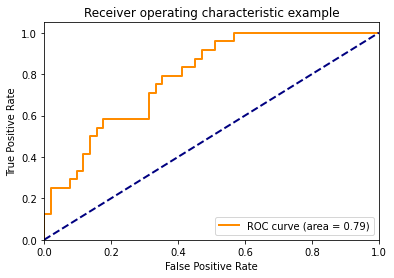

In [90]:
def plot_roc(fpr, tpr, roc_auc, title='Receiver operating characteristic example')
    """ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html"""
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [86]:
import numpy as np
arr = np.arange(0, 10)
np.where(arr==1)[0]

array([1])

In [71]:
import numpy as np

import pandas as pd
import glob
import os
import re

train_path = '../tusz_1_5_2/edf/train'
tcp_type = '01_tcp_ar'
patient_group = '004'
patient = '00000492'
session = 's003_2003_07_18'
token = '00000492_s003_t001'


def listdir_edfs():
    """Returns all edf filepaths in a DataFrame
    
    Returns:
        pd.DataFrame: filepaths
    """
    columns=('path0','path1','path2','path3', 'tcp_type', 'patient_group', 'patient', 'session', 'token')

    filelist = glob.glob(os.path.join('../tusz_1_5_2/edf/train/01_tcp_ar', '**', '*.edf'), recursive=True)
    fparts = [re.split('/|[.]edf',filename)[:-1] for filename in filelist]

    df = pd.DataFrame({key:value for key, value in zip(tuple(columns), tuple(zip(*fparts)))})

    # A very complicated lambda function
    return df.assign(token_path = lambda x: eval("""eval("+'/'+".join(["x."""+'","x.'.join(x.columns)+'"]))'))


df = listdir_edfs()
df.shape
df.head()




,path0,path1,path2,path3,tcp_type,patient_group,patient,session,token,token_path
0,..,tusz_1_5_2,edf,train,01_tcp_ar,104,00010435,s001_2013_06_19,00010435_s001_t000.edf,../tusz_1_5_2/edf/train/01_tcp_ar/104/00010435...
1,..,tusz_1_5_2,edf,train,01_tcp_ar,104,00010461,s001_2013_06_21,00010461_s001_t000.edf,../tusz_1_5_2/edf/train/01_tcp_ar/104/00010461...
2,..,tusz_1_5_2,edf,train,01_tcp_ar,104,00010450,s001_2013_06_19,00010450_s001_t000.edf,../tusz_1_5_2/edf/train/01_tcp_ar/104/00010450...
3,..,tusz_1_5_2,edf,train,01_tcp_ar,104,00010450,s001_2013_06_19,00010450_s001_t001.edf,../tusz_1_5_2/edf/train/01_tcp_ar/104/00010450...
4,..,tusz_1_5_2,edf,train,01_tcp_ar,104,00010489,s005_2013_07_10,00010489_s005_t006.edf,../tusz_1_5_2/edf/train/01_tcp_ar/104/00010489...


In [81]:
import re
[re.split('/|[.]edf',filename)[:-1] for filename in filelist]


[['..',
  'tusz_1_5_2',
  'edf',
  'train',
  '01_tcp_ar',
  '104',
  '00010435',
  's001_2013_06_19',
  '00010435_s001_t000'],
 ['..',
  'tusz_1_5_2',
  'edf',
  'train',
  '01_tcp_ar',
  '104',
  '00010461',
  's001_2013_06_21',
  '00010461_s001_t000'],
 ['..',
  'tusz_1_5_2',
  'edf',
  'train',
  '01_tcp_ar',
  '104',
  '00010450',
  's001_2013_06_19',
  '00010450_s001_t000'],
 ['..',
  'tusz_1_5_2',
  'edf',
  'train',
  '01_tcp_ar',
  '104',
  '00010450',
  's001_2013_06_19',
  '00010450_s001_t001'],
 ['..',
  'tusz_1_5_2',
  'edf',
  'train',
  '01_tcp_ar',
  '104',
  '00010489',
  's005_2013_07_10',
  '00010489_s005_t006'],
 ['..',
  'tusz_1_5_2',
  'edf',
  'train',
  '01_tcp_ar',
  '104',
  '00010489',
  's005_2013_07_10',
  '00010489_s005_t007'],
 ['..',
  'tusz_1_5_2',
  'edf',
  'train',
  '01_tcp_ar',
  '104',
  '00010489',
  's005_2013_07_10',
  '00010489_s005_t005'],
 ['..',
  'tusz_1_5_2',
  'edf',
  'train',
  '01_tcp_ar',
  '104',
  '00010489',
  's005_2013_07_10',
 

# PostgreSQL

In [40]:
import numpy as np
arr = np.array([[1,2,3], [4,5,6], [7,8,9]])
arr[np.array((0,1)),:-1].shape

(2, 2)

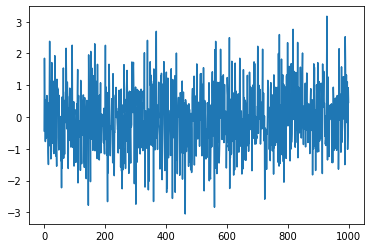

In [43]:
import matplotlib.pyplot as plt
plt.plot(np.random.randn(1000))

# Panda.DataFrame

In [13]:
# panda data frame group by and aggregation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
np.random.seed(0)
df = pd.DataFrame(dict(a=np.random.rand(10), b=np.random.rand(10), group=np.repeat(['A', 'B'], 5)))

df

,a,b,group
0,0.548814,0.791725,A
1,0.715189,0.528895,A
2,0.602763,0.568045,A
3,0.544883,0.925597,A
4,0.423655,0.071036,A
5,0.645894,0.087129,B
6,0.437587,0.020218,B
7,0.891773,0.832620,B
8,0.963663,0.778157,B
9,0.383442,0.870012,B


In [15]:
# group by c=a+b
df.groupby('group').agg('sum')

,a,b
group,,
A,2.835304,2.885297
B,3.322359,2.588136


In [16]:
res = []
for name, group in df.groupby('group'):
    res.append(group.assign(c = lambda x: x.a+x.b))
pd.concat(res)

,a,b,group,c
0,0.548814,0.791725,A,1.340539
1,0.715189,0.528895,A,1.244084
2,0.602763,0.568045,A,1.170808
3,0.544883,0.925597,A,1.470480
4,0.423655,0.071036,A,0.494691
5,0.645894,0.087129,B,0.733023
6,0.437587,0.020218,B,0.457806
7,0.891773,0.832620,B,1.724393
8,0.963663,0.778157,B,1.741820
9,0.383442,0.870012,B,1.253454


In [31]:
# long to wide
pd.concat(res).assign(index=np.tile(np.arange(0,5),2)).pivot(index='index',columns='group', values=['a', 'b', 'c'])

# df2.reset_index()

a                   b                   c          
group         A         B         A         B         A         B
index                                                            
0      0.548814  0.645894  0.791725  0.087129  1.340539  0.733023
1      0.715189  0.437587  0.528895  0.020218  1.244084  0.457806
2      0.602763  0.891773  0.568045  0.832620  1.170808  1.724393
3      0.544883  0.963663  0.925597  0.778157  1.470480  1.741820
4      0.423655  0.383442  0.071036  0.870012  0.494691  1.253454

## Scikit learn

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
    random_state=0)

np.shape(X), np.shape(y)

((10000, 10), (10000,))

In [11]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X[0:5], X_scaled[0:5]

(array([[  6.46907649,   4.25070317,  -8.63694437,   4.04478517,
           9.01725363,   4.53587229,  -4.67027643,  -0.48172814,
          -6.44996141,  -2.65984972],
        [  6.48856404,   9.37957037,  10.32791736,  -1.76505523,
          -2.06884193,  -9.53778962,   3.93637985,   3.37542134,
           7.41273719,  -9.72284371],
        [  8.37392753, -10.14342267,  -3.52753613,  -7.33883416,
           1.38555733,   6.96141714,  -4.50445645,  -7.31536045,
          -2.33070872,   6.44087163],
        [ -3.41410113,  -2.01978984,  -2.7481082 ,   4.16869118,
          -5.78865167,  -7.46868472,  -1.71979965,  -5.30265511,
           4.53409855,  -4.61369461],
        [ -1.33002345,  -3.72546538,   9.55999918,  -6.7513564 ,
          -7.40786424,  -2.13151485,   1.76601335,   2.38150639,
          -1.88656804,   8.6673109 ]]),
 array([[ 1.14352478,  0.79158784, -1.33837215,  0.79192289,  1.42029234,
          0.79512184, -0.85277545,  0.06768039, -1.29407862, -0.61810947],
        [

In [2]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9823000000000001

In [8]:
clf = RandomForestClassifier(n_estimators=10, max_features='sqrt', max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9997

In [4]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999

True